# D-REX (exp. 1)

In [1]:
from cmme.drex import DREXDistribution

# changepoint 30. delta_beta = 2.5, direction = 0.
input_sequence = [-11, -6, 9, -3, -7, 4, 6, -1, -3, 4, 9, -14, -8, -8, -7, 2, 4, 3, 0, -7, 8, 2, -4, -15, -10, 7, 9, -9, 3, -4, -16, -15, -11, -8, -7, -8, -9, -9, -7, -4, -1, -1, 0, 1, 2, 1, -2, -5, -5, -2, 0, -1, -3, -1, 1, 2, 3, 4, 7, 8]

prior_input_sequence = [-17, -16, 0, 1, 2, 5, 16, 17]
prior_distribution = DREXDistribution.GAUSSIAN
prior_DOrMaxNComp = 3

alphabet_levels = sorted(set(input_sequence))

print("Input sequence:", input_sequence)
print("Length of input sequence:", len(input_sequence))
print()
print("DREX: Prior input sequence:", prior_input_sequence)
print("DREX: Length of prior input sequence:", len(prior_input_sequence))
print("DREX: Prior distribution:", prior_distribution)
print("DREX: Prior D or MaxNComp:", prior_DOrMaxNComp)
print()
print("PPM: Alphabet levels:", alphabet_levels)

Input sequence: [-11, -6, 9, -3, -7, 4, 6, -1, -3, 4, 9, -14, -8, -8, -7, 2, 4, 3, 0, -7, 8, 2, -4, -15, -10, 7, 9, -9, 3, -4, -16, -15, -11, -8, -7, -8, -9, -9, -7, -4, -1, -1, 0, 1, 2, 1, -2, -5, -5, -2, 0, -1, -3, -1, 1, 2, 3, 4, 7, 8]
Length of input sequence: 60

DREX: Prior input sequence: [-17, -16, 0, 1, 2, 5, 16, 17]
DREX: Length of prior input sequence: 8
DREX: Prior distribution: DREXDistribution.GAUSSIAN
DREX: Prior D or MaxNComp: 3

PPM: Alphabet levels: [-16, -15, -14, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 6, 7, 8, 9]


In [2]:
from pathlib import Path
from cmme.config import Config

base_path = Path(Config().model_io_path())
print(base_path)

/Users/alexander/git/cmme-jupyter/io


In [3]:
ppm_model_instructions_file_path = base_path / "drex_stimulus-ppm_model_instructions.csv"
ppm_model_results_file_path = base_path / "drex_stimulus-ppm_model_results.csv"

print(ppm_model_instructions_file_path)
print(ppm_model_results_file_path)

/Users/alexander/git/cmme-jupyter/io/drex_stimulus-ppm_model_instructions.csv
/Users/alexander/git/cmme-jupyter/io/drex_stimulus-ppm_model_results.csv


In [4]:
drex_calculate_prior_instructions_file_path = base_path / "drex_stimulus-drex_prior_instructions.mat"
drex_calculate_prior_results_file_path = base_path / "drex_stimulus-drex_prior_results.mat"

drex_model_instructions_file_path = base_path / "drex_stimulus-drex_model_instructions.mat"
drex_model_results_file_path = base_path / "drex_stimulus-drex_model_results.mat"

print(drex_calculate_prior_instructions_file_path)
print(drex_calculate_prior_results_file_path)
print()
print(drex_model_instructions_file_path)
print(drex_model_results_file_path)

/Users/alexander/git/cmme-jupyter/io/drex_stimulus-drex_prior_instructions.mat
/Users/alexander/git/cmme-jupyter/io/drex_stimulus-drex_prior_results.mat

/Users/alexander/git/cmme-jupyter/io/drex_stimulus-drex_model_instructions.mat
/Users/alexander/git/cmme-jupyter/io/drex_stimulus-drex_model_results.mat


In [5]:
plot_output_base_path = base_path / "drex_stimulus.xyz"
print(plot_output_base_path)

/Users/alexander/git/cmme-jupyter/io/drex_stimulus.xyz


# PPM

In [6]:
from cmme.ppm import *

ppmib = PPMDecayInstanceBuilder()
ppmib.with_instructions_file_path(ppm_model_instructions_file_path).with_results_file_path(ppm_model_results_file_path)

ppm = ppmib.alphabet_levels(alphabet_levels).build()

result = ppm.observe(input_sequence, [])

ppm_output_file = result
print("PPM output file:", ppm_output_file)

[1] "/Users/alexander/git/cmme-jupyter/io/drex_stimulus-ppm_model_results.csv"

PPM output file: /Users/alexander/git/cmme-jupyter/io/drex_stimulus-ppm_model_results.csv


# D-REX

In [7]:
from cmme.drex import *

drexpe = DREXPriorEstimator(drex_calculate_prior_instructions_file_path, drex_calculate_prior_results_file_path)
prior_estimator_result = drexpe.estimate(prior_distribution, prior_input_sequence, prior_DOrMaxNComp)

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-776d5c11-96fa-4427-aad9-af3e1dcd2de3
Send 'exit' command to kill the server
....MATLAB started and connected!


In [8]:
prior_estimator_output_file = prior_estimator_result['result']['results_file_path']
prior = DREXPriorOutputParameters.from_mat(prior_estimator_output_file)

In [9]:
drexib = DREXInstanceBuilder(prior)
drexib.with_instructions_file_path(drex_model_instructions_file_path).with_results_file_path(drex_model_results_file_path)
drex = drexib.build()

In [10]:
result = drex.observe(input_sequence)
print(result)

MATLAB closed
Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-f1ce7e90-a75e-4a69-b211-c090c29f4431
Send 'exit' command to kill the server
....MATLAB started and connected!
{'result': {'results_file_path': '/Users/alexander/git/cmme-jupyter/io/drex_stimulus-drex_model_results.mat'}, 'success': True, 'content': {'stdout': "\nmodel_as_string =\n\n    'D-REX(distribution=gaussian, D=3, hazard=0.01, obsnz=[0.0], memory=inf, maxhyp=inf)'\n\n", 'figures': [], 'datadir': '/private/var/folders/k8/rwfqyjkn7tldqfjyyc_mp27c0000gn/T/MatlabData/'}}


In [11]:
drex_output_file = result['result']['results_file_path']

print("DREX output file:", drex_output_file)

DREX output file: /Users/alexander/git/cmme-jupyter/io/drex_stimulus-drex_model_results.mat


# Plot

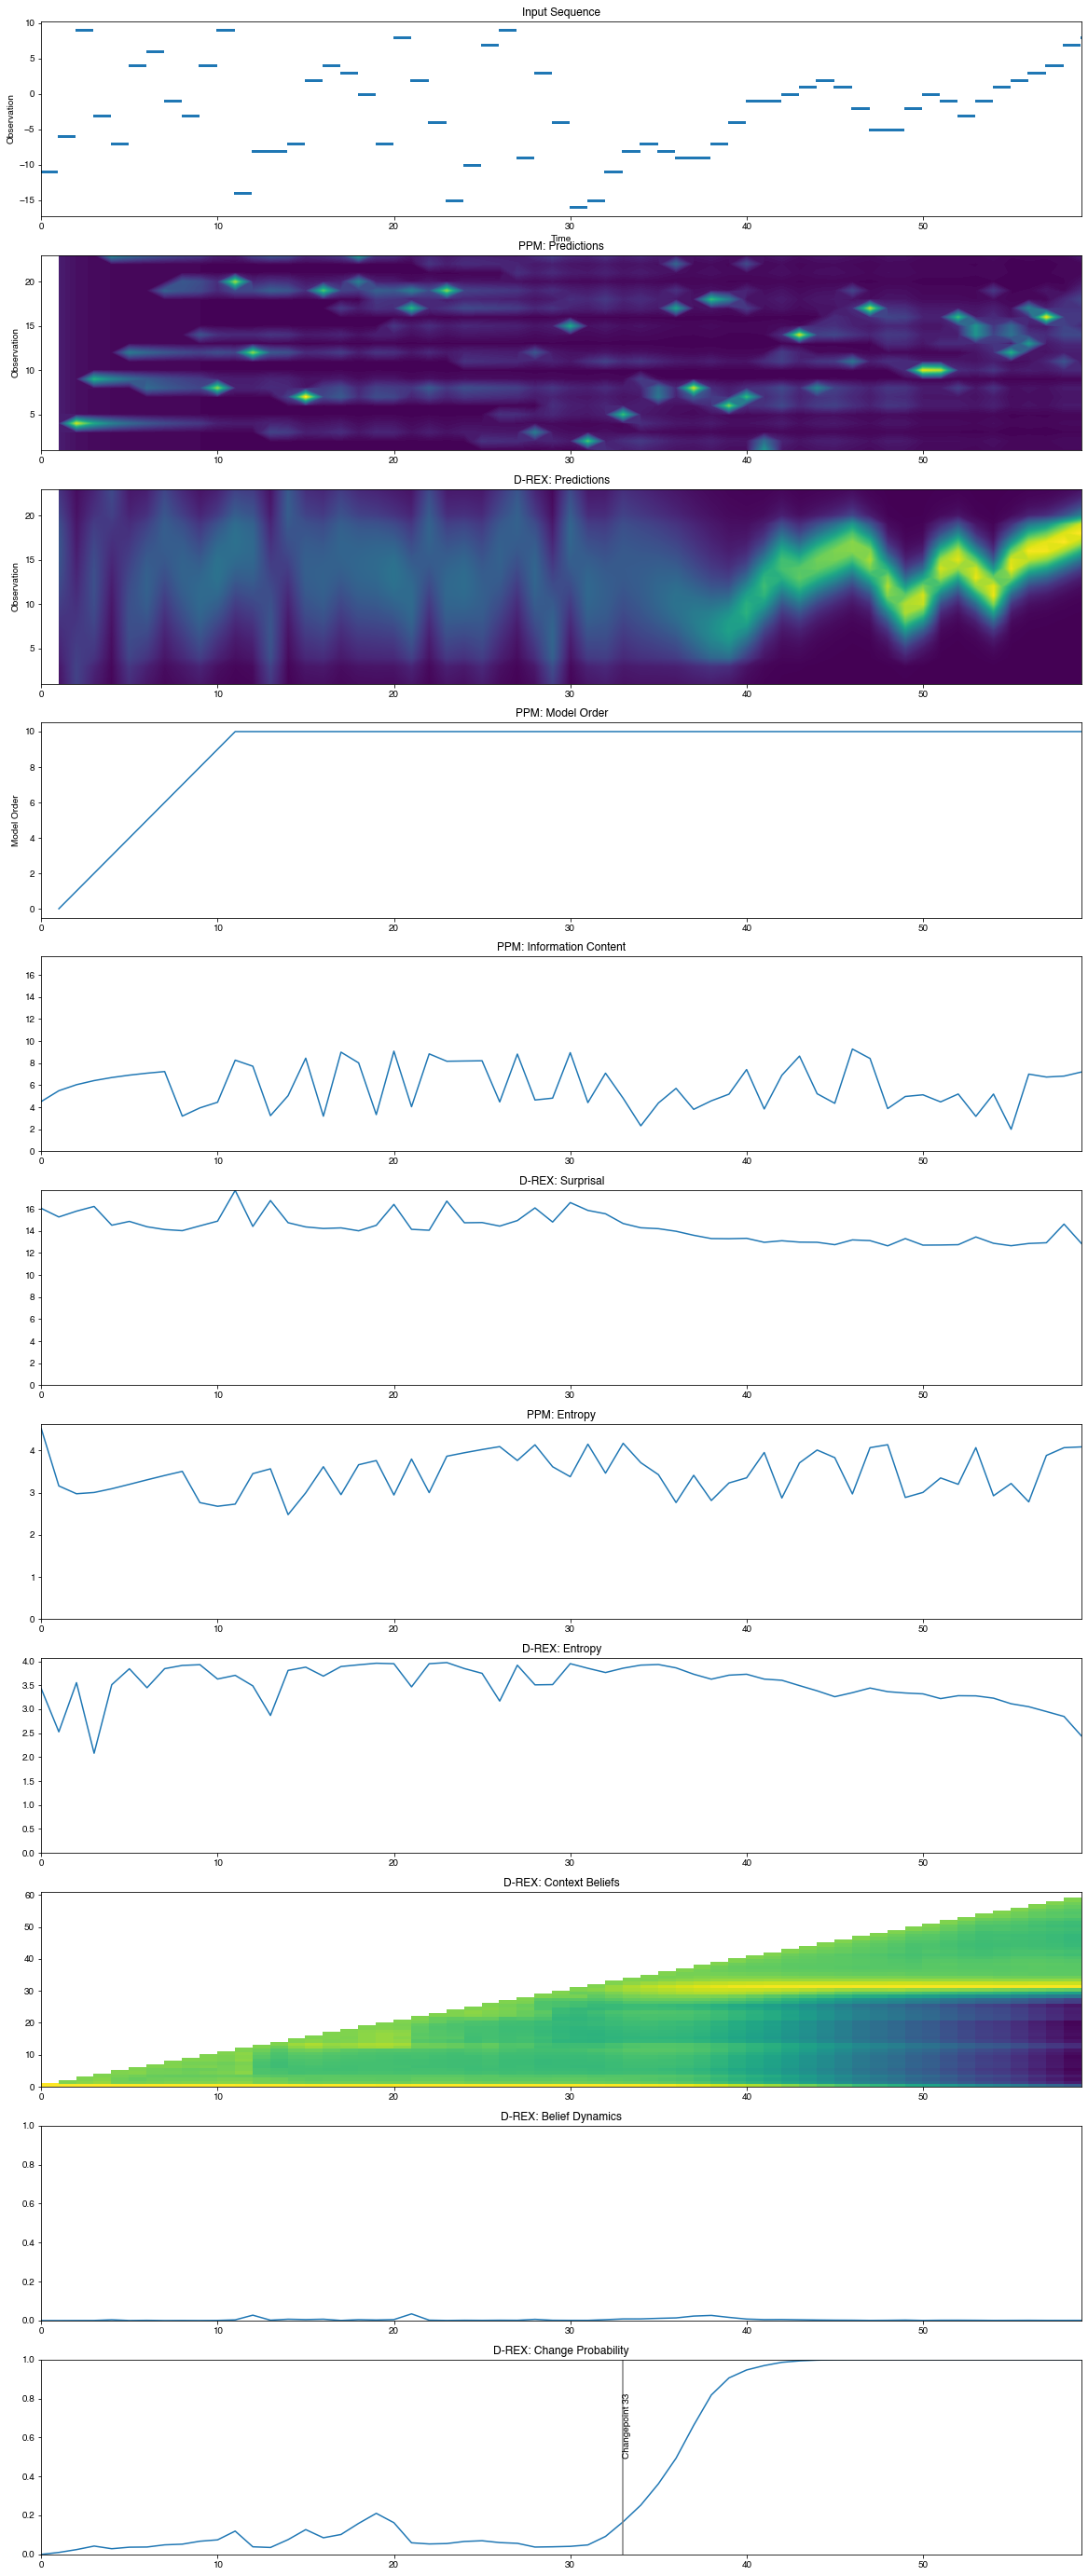

In [12]:
from cmme.model_output_plot import *

mop = ModelOutputPlot(ppm_output_file, drex_output_file, plot_output_base_path)
mop_figures = mop.plot_matplotlib()

2022-08-20 19:29:30.424 MATLAB[24464:984122] CoreText note: Client requested name ".SFNS-Regular", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2022-08-20 19:29:30.424 MATLAB[24464:984122] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2022-08-20 19:29:30.432 MATLAB[24464:984122] CoreText note: Client requested name ".SFNS-Bold", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2022-08-20 19:29:30.440 MATLAB[24464:984122] CoreText note: Client requested name ".SFNS-Regular", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2022-08-20 19:29:30.440 MATLAB[24464

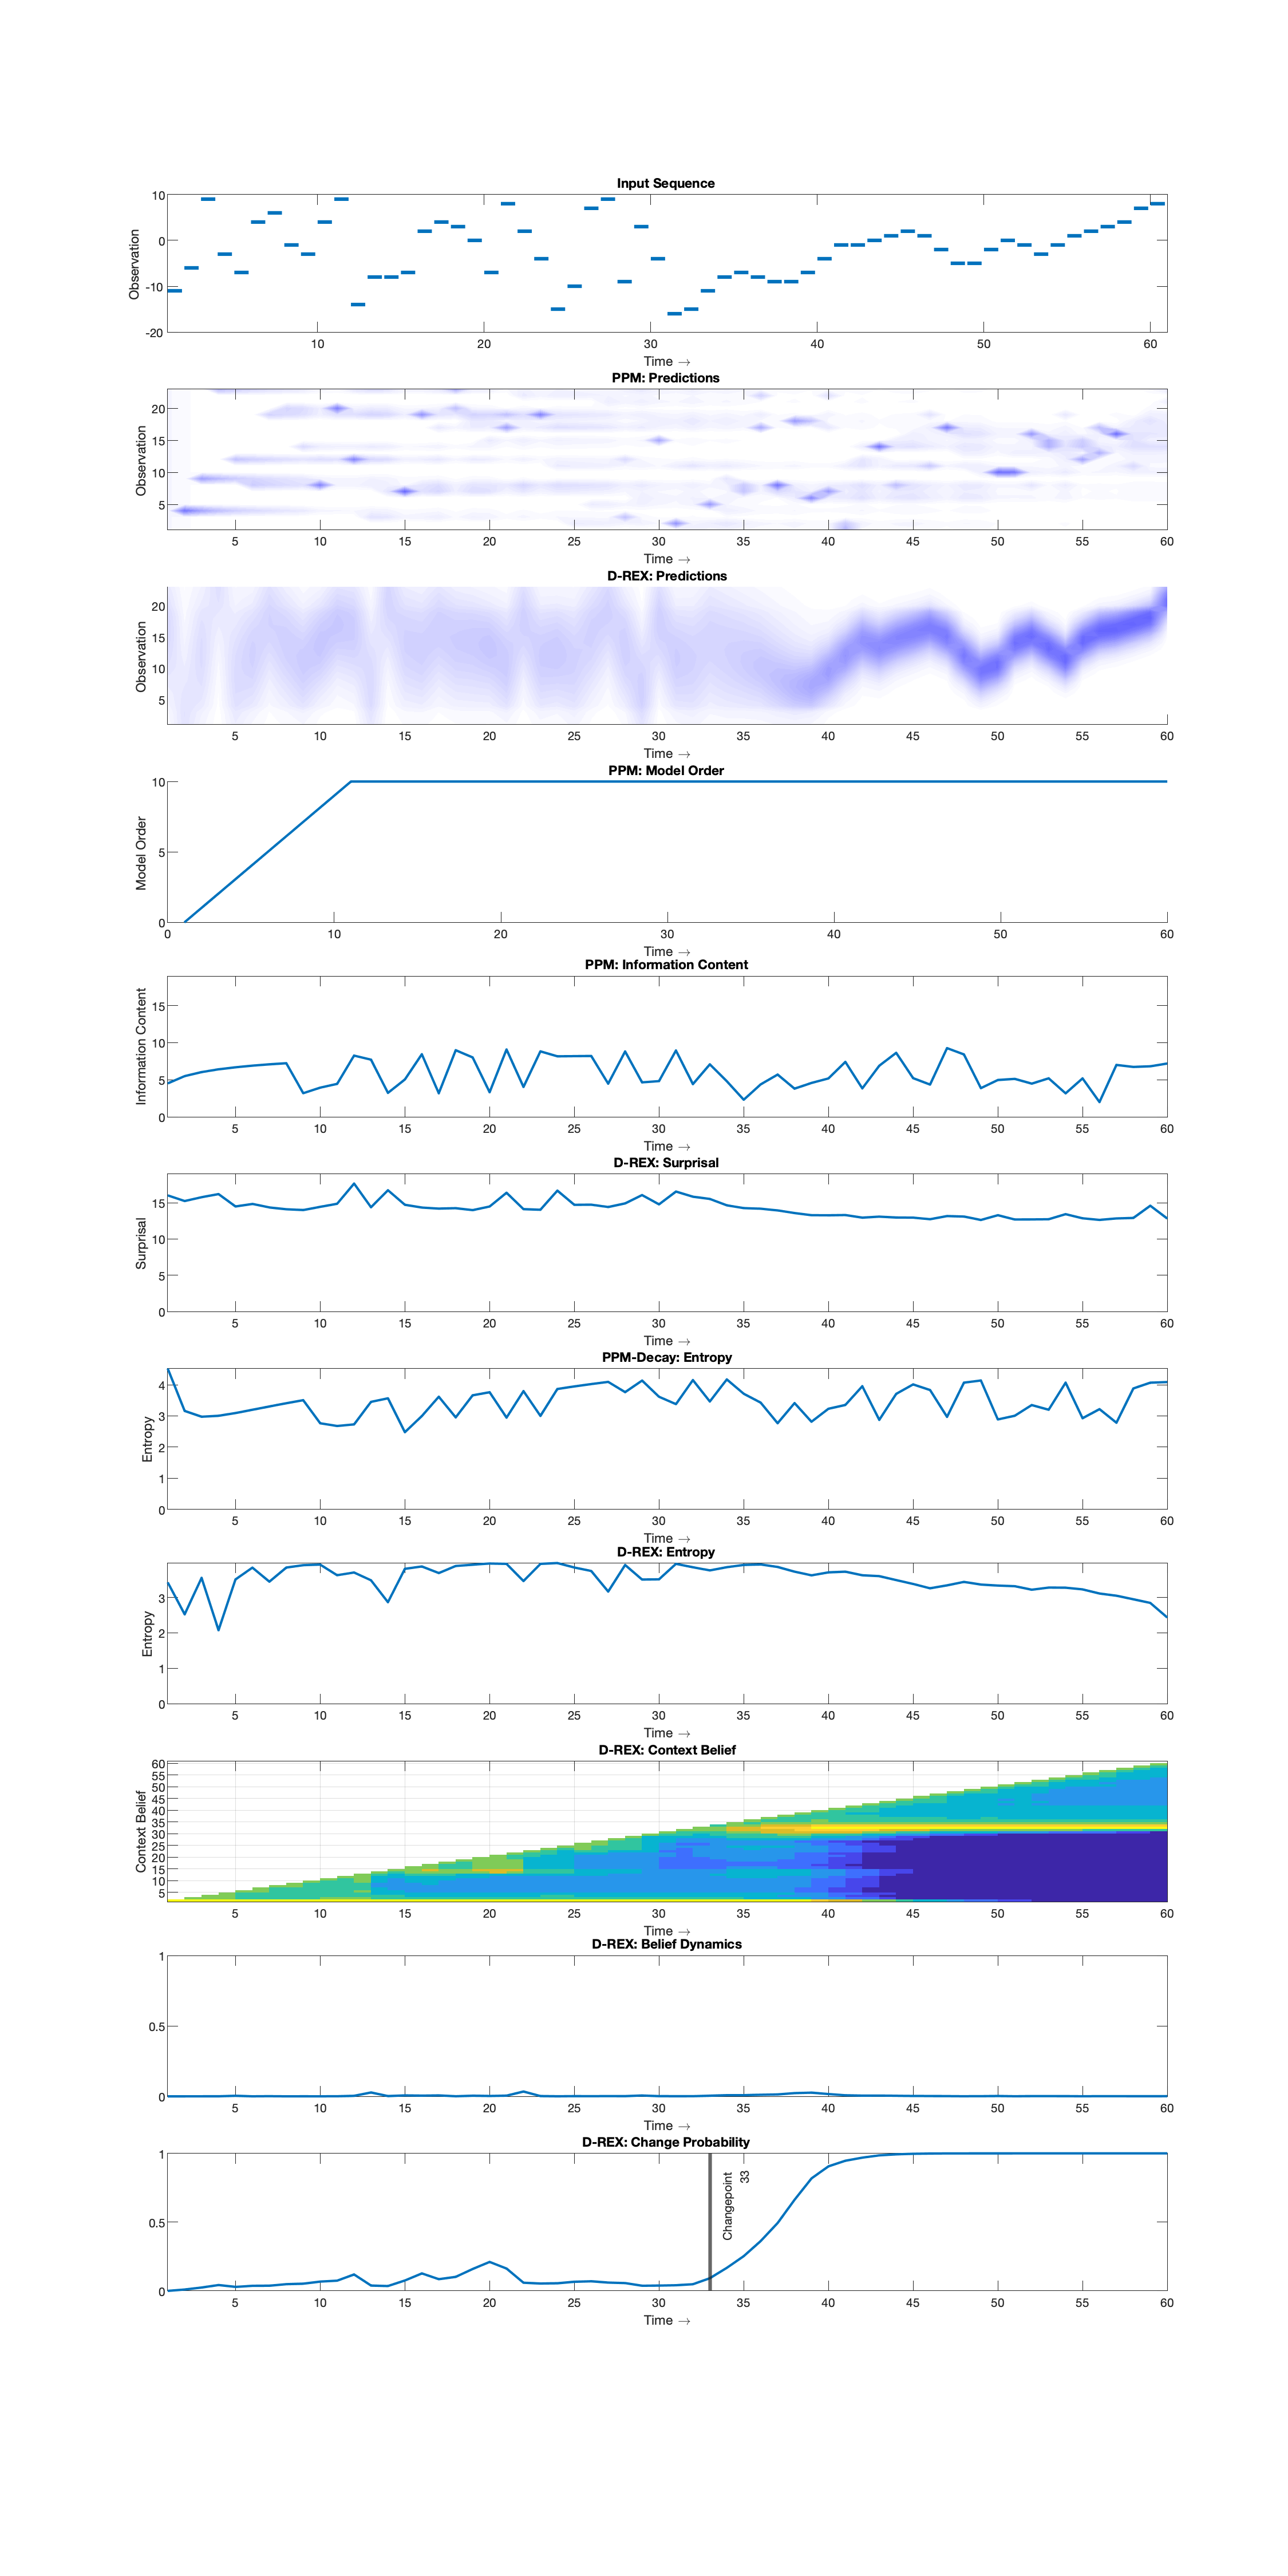

MATLAB closed


In [13]:
# Or use MATLAB version of the plot:
mop_figures = mop.plot()

from IPython.display import Image
for f in mop_figures:
    display(Image(filename=f))